## Deconvolute $\partial I_\mathrm{PAT}/\partial V_D$ (no lock-in broadening)

$\displaystyle S_V^\prime(V)=S_V\left(\frac{Ve}{\hbar}\right)/2\pi V^2$

$\omega=eV/\hbar$

$\displaystyle I_\mathrm{PAT}(V_D)=
\int_0^\infty S_V^\prime(V)I_\mathrm{QP,0}(V_D+V) \mathrm{d}V$

Differentiate under integral?

$\displaystyle\frac{\partial I_\mathrm{PAT}}{\partial V_E}(V_D)=
\int_0^\infty \frac{\partial}{\partial V_E}S_V^\prime(V)I_\mathrm{QP,0}(V_D+V) \mathrm{d}V$

## Single-frequency $\partial I_\mathrm{PAT}/\partial V_D$ model (with lock-in broadening)
Photon frequency due to lock-in. **The amplitude ($\Delta\omega$) scales with the charge transfer of either 1e or 2e, meaning that a 1e peak will be less affected by broadening.**

$\omega(t)=\omega_0+\Delta\omega\cos(t)$

Constant $Z(\omega)$ or first order approximation:

$Z(\omega)=Z(\omega_0)+Z'(\omega_0)(\omega-\omega_0)$

Average single lock-in cycle to get first harmonic amplitude (and probably divide by $\sqrt{2}$ to get RMS)

$\displaystyle\frac{\partial I_\mathrm{PAT}}{\partial V_E}(V_D)=
\frac{1}{2\pi}\frac{e^2 I_c}{8\pi\hbar^2}\int_0^{2\pi} \frac{Z(\omega(t))^2}{\omega(t)^2}I_\mathrm{QP,0}\left(V_D+\frac{\hbar\omega(t)}{e}\right)\cos(t)\mathrm{d}t$

Not an easy integral, but can be calculated/fitted numerically. Variables:
- $\omega_0$ and $\Delta\omega$
- $Z$ (and slope at $\omega$)


In [12]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from scipy import interpolate, ndimage, integrate, linalg, stats, signal
from scipy.constants import pi, e, hbar

from ipywidgets import widgets, interact

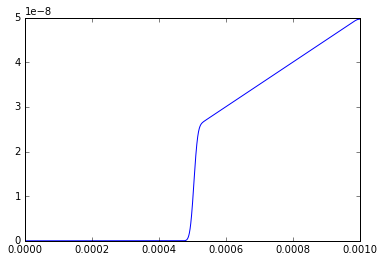

In [68]:
# Set 2Delta voltage, V_DET step size and corresponding omega step size
two_delta = 505e-6
G_N = 0.5e-4
dV = 0.3e-6
dw = (e * dV) / hbar

# Create QP0 curve
V_QP0 = np.arange(0, 1000e-6, dV)
I_QP0 = np.piecewise(V_QP0, [V_QP0 < two_delta, V_QP0 >= two_delta], [0, lambda x: G_N * x])
#I_QP0 = signal.savgol_filter(I_QP0_orig, window_length=51, polyorder=3)
I_QP0 = ndimage.filters.gaussian_filter1d(I_QP0, 30)

# Create S_V spectrum
omegas = np.arange(0, int(two_delta / dV)) * dw

plt.plot(V_QP0,I_QP0)

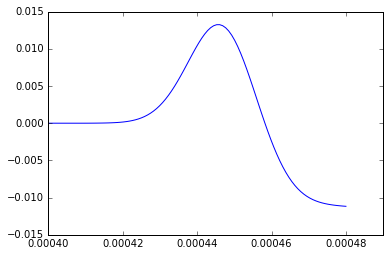

In [69]:
t = np.linspace(0, 2*np.pi, 100)
dt = t[1] - t[0]
V_D = np.linspace(400e-6, 480e-6, 100)

qp0 = interpolate.interp1d(V_QP0, I_QP0)

def func(w0, dw, Z, Ic):
    w0 = w0 * 1e9
    dw = dw * 1e9
    
    w = w0 + dw * np.cos(t)
    
    A = np.tile(V_D[:,np.newaxis], len(w)) + np.tile(w*hbar/e, (len(V_D),1))
    A = qp0(A.ravel())
    A = A.reshape((len(V_D), -1))
    
    b = 1 / (2*np.pi) * ((e**2*Ic)/(8*np.pi*hbar**2)) * (Z/w)**2 * np.cos(t) * dt
    
    plt.plot(V_D, A.dot(b))

#func(250e9, 5e9, 1, 1)
interact(func, w0=100, dw=10, Z=1, Ic=1)

In [59]:
(90e9*hbar)/e

5.923907563020666e-05